# Lecture 12 Part 1 - Mixture Models & The Expectation-Maximization (EM) Algorithm

What if the data for a *single class* looks like the plot below?

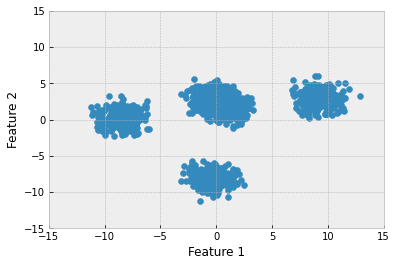

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples = 1500, centers = 5)

plt.scatter(data[:,0],data[:,1]); plt.axis([-15,15,-15,15])
plt.xlabel('Feature 1'); plt.ylabel('Feature 2');

If we assume a single Gaussian distribution, we would obtain a very poor estimate of the true underlying data likelihood.

# Mixture Models

We can better represent this data with a **mixture model**:

$$p(x|\Theta) = \sum_{k=1}^K \pi_k P(x|\Theta_k)$$

where $\Theta = \{\Theta_k\}_{k=1}^K$ are set of parameters that define the distributional form in the probabilistic model $P(\bullet|\Theta_k)$ and 

\begin{align*}
0 & \leq \pi_k \leq 1\\
& \sum_k \pi_k = 1
\end{align*}

# Gaussian Mixture Models

A **Gaussian Mixture Model** or **GMM** is a probabilistic model that assumes a data likelihood to be a weighted sum of Gaussian distributions with unknown parameters.

$$p(\mathbf{x}|\Theta) = \sum_{k=1}^K \pi_k N(\mathbf{x}|\mathbf{\mu}_k,\Sigma_k)$$

where $\Theta=\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^K$, $0 \leq \pi_k \leq 1$ and $\sum_{k=1}^K \pi_k = 1$.

* When standard distributions (such as Gamma, Exponential, Gaussian, etc.) are not sufficient to characterize a *complicated* data likelihood, we can instead characterize it as the sum of weighted Gaussians distributions

* Another way that GMMs are most commonly used for is to partition data in subgroups

___

# Modeling a Data Likelihood as a Gaussian Mixture Model

* GMMs can be used to learn a complex distribution that represent a dataset. Thus, it can be used within the probabilistic generative classifier framework to model complex data likelihoods.

* GMMs are also commonly used for **clustering**. Here a GMM is fit to a dataset with the goal of partitioning it into clusters.

**<font color=blue>Step 1</font>**

Describe the **observed data likelihood**, $\mathcal{L}^o$. As seen last class:

\begin{align*}
\mathcal{L}^0 = \prod_{i=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k)
\end{align*}

**<font color=blue>Step 2</font>**

Describe the log-likelihood function:

\begin{align*}
\mathcal{L} &= \ln\left(\prod_{i=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k)\right)\\
\iff \mathcal{L} &= \sum_{i=1}^N \ln \left( \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k) \right)
\end{align*}

**<font color=blue>Step 3</font>**

Optimize for the parameters $\Theta=\{\pi_k, \mu_k,\Sigma_k\}_{k=1}^K$

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \mu_k} = 0, \frac{\partial \mathcal{L}}{\partial \Sigma_k} = 0, \text{ and }, \frac{\partial \mathcal{L}}{\partial \pi_k} = 0
\end{align*}

but this is a difficult problem to maximize!

* A common approach for estimating the parameters of a GMM given a data set is by using the **Expectation-Maximization (EM) algorithm**.

___

## Applications of Mixture Models

* **Data Representation and Inference**. Represent *any* data set using a complex distribution. You may want to describe your data with a distribution but the data does not fit into a standard form (e.g. Gamma, Gaussian, Exponential, etc.), then you can use a (Gaussian) Mixture Model to describe the data. Having a representation of your data in a distribution form is a very powerful tool that, other than having a model of the data, allows you infer about new samples, make predictions, etc.
    * Having a parametric form for a real world model, allows us to apply it in simulation and use it for designing/optimizing decision-making solutions.

* **Clustering.** Partition the data into groups. Note that in the GMMs formulation we did not add the concept of labels/targets. So GMMs are an **unsupervised learning** model. It represents the data with a very complex likelihood and then we can decompose that likelihood to partition the data into categories. This is also known as **clustering**.

___

# Expectation-Maximization (EM) algorithm

**<font color=blue>Example: Censored Data</font>**

Consider the observation of i.i.d. samples $x_1, x_2, \dots, x_N$ from the data likelihood $p(\mathbf{x}|\Theta)$ and we want to estimate the parameters (using MLE approach, for example)

\begin{align*}
& \arg_{\Theta} \max p(\mathbf{x}|\Theta) \\
= & \arg_{\Theta} \max \prod_{i=1}^N p(x_i|\Theta) 
\end{align*}

Now suppose the data samples $x_1, x_2, \dots, x_N$ are **censored**.

For example, suppose we observe i.i.d. samples, $x_1, x_2, \dots, x_N$, from some sensor $f(\mathbf{x})$. This sensor returns censored data in the form,

\begin{align*}
f(\mathbf{x}) = \begin{cases} x, &&\text{ if }  x < a \\ a && \text{ if }x\geq a \end{cases}
\end{align*}

This means that we see $x_1, x_2,\dots, x_m$ (less than $a$) and we do not see $x_{m+1}, x_{m+2}, \dots, x_N$ which are censored and set to $a$.

* An example of such censored data would be a scale that can only measure weight up to 120 lbs. Any measurements above 120 would be *censored* at 120.

* Given this censored data, we want to estimate the mean of the data as if the data was uncensored.

For this case, we can write our *observed* data likelihood as:

\begin{align*}
\mathcal{L}^0 = \prod_{i=1}^m p(x_i|\Theta) \prod_{j=m+1}^N \int_a^{\infty} p(x_j|\Theta) dx_j
\end{align*}

The data likelihood would be very difficult to maximize to solve for $\Theta$.

If only we *knew* what the missing/censored data, the problem would be easy to solve!

## Hidden Latent Variables

The **Expectation-Maximization** or **EM** algorithm is used to find the Maximum Likelihood Estimators (MLE) (or MAP estimators) for model parameters when data is incomplete, has missing data points, or has unobserved (hidden) latent variables (such as the case of censored data). 

* For all of these cases, the MLE optimization is very difficult to obtain by simply taking the derivative and solve for the parameters.

**<font color=orange>Step 1</font>**
The first step of EM is to characterized the observed likelihood $\mathcal{L}^0$.

**<font color=orange>Step 2</font>**
Introduce *hidden latent variables* (also referred to as *hidden variables*) that simplify the observed data likelihood, $\mathcal{L}$.

**<font color=orange>Step 3</font>**
Use the hidden variables to define the *complete likelihood* $\mathcal{L}^c$.

With this, we build the EM optimization function:

\begin{align*}
\arg_{z,\Theta} \max Q(\Theta,\Theta^t)
\end{align*}

where 

\begin{align*}
Q(\Theta,\Theta^t) = E[\ln(\mathcal{L^c})|X,\Theta^t]
\end{align*}

$E[\bullet]$ denotes expected value and $t$ denotes *iteration*. At $t=0$, we start with random values for the parameters $\Theta$.

Once we have this, the EM algorithm will iterate between the E-step and the M-step:

1. **<font color=blue>E-step</font> (Expectation step)** Estimate the hidden variables. While holding $\Theta$ fixed, find the variables $z$ that maximize $E[\ln(\mathcal{L^c})]$.

2. **<font color=blue>M-step</font> (Maximization step)** Estimate the parameters of the complete data likelihood $\mathcal{L}^c$. While holding the newly found variables $z$, find the best values for the parameters $\Theta$ that maximize $E[\ln(\mathcal{L^c})]$.

and it keeps iterating between E-step and M-step until convergence or until a certain number of iterations is reached.

## Alternating Optimization

* EM is an **alternating optimization** algorithm, as it alternates between E-step and M-step in order to find the hidden variables and best set of parameters, respectively.
    * In the first step ($t=0$), EM will start with a random guess for the value of the parameters $\Theta$ in order to perform the E-step.
    * What is the problem with alternating optimization algorithms in general?

* EM is a general algorithm that can be applied to a variety of problems (not just the examples we are learning today). 

* EM is heavily tied with Maximum Likelihood Estimation (MLE). It is commonly used to simplify difficult MLE problems.
    * It was originally introduced by Dempster, Laird, and Rubin in 1977 in a paper called ["Maximum Likelihood from Incomplete Data via the EM Algorithm"](https://rss.onlinelibrary.wiley.com/doi/pdf/10.1111/j.2517-6161.1977.tb01600.x).

___

# Optimizing GMM with the EM Algorithm

The observed data likelihood for a Gaussian Mixture Model (GMM) is

\begin{align*}
\mathcal{L}^0 = \prod_{i=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k)
\end{align*}

**What hidden variables can we add to simplify this problem?**

* In this example, a hidden variable can be the label of the Gaussian from which $x_i$ was drawn from.

\begin{align*}
z_i: \text{label of the Gaussian from which $x_i$ was drawn from}
\end{align*}

If we know $z_i$, then for each data point we know which Gaussian it was drawn from along with its respective parameter $\mu_{z_i}$ and $\Sigma_{z_i}$ and its respective weight $\pi_{z_i}$. So, each data point would had been drawn from $\pi_{z_i}N(x_i|\mu_{z_i}, \Sigma_{z_i})$. 

Then, assuming we have $\{z_i\}_{i=1}^N$, we can write the complete data likelihood:

\begin{align*}
\mathcal{L}^c = \prod_{i=1}^N \pi_{z_i}\mathcal{N}(x_i|\mathbf{\mu}_{z_i},\Sigma_{z_i})
    \end{align*}

Now we can iterate between the **E-step** and **M-step** of the EM algorithm until we find convergence or we have reached a threshold for a number of iterations.

# Optimization Function

We can now extent the optimization function:

\begin{align*}
Q(\Theta,\Theta^t) &= E[\ln(\mathcal{L^c})|X,\Theta^t] \\
&= \sum_{\mathbf{z}} \ln(\mathcal{L^c}) P(z|X,\Theta^t) \\
&= \sum_{z_i=1}^K \ln(\mathcal{L^c}) P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)
\end{align*}

### **<font color=blue>E-step (Expectation Step)</font>**

In order to complete the E-STEP, we need to know how to compute $P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)$. 

* This is the posterior probability of the label $z_i$ for data sample $x_i$.

* So we want to assign the label $z_i$ to the data sample $x_i$ for which the posterior probability is maximized (just like in Naive Bayes classification).

Recall from **Bayes' Rule**: for two non-empty events $A$ and $B$, $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$. We can use this theorem to rewrite $P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)$:

\begin{align*}
P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t) &= \frac{P(\mathbf{x}_i|\mathbf{z}_i,\Theta^t)P(\mathbf{z}_i|\Theta^t)}{P(\mathbf{x}_i|\Theta^t)} \\
&= \frac{P(\mathbf{x}_i|\mathbf{\mu}_{z_i}^t, \Sigma_{z_i}^t) \pi_{z_i}^t}{\sum_{z_i=1}^K \pi_{z_i}^t P(\mathbf{x}_i|\mathbf{\mu}_{z_i}^t, \Sigma_{z_i}^t)} \\
&= C_{ik}
\end{align*}

This is called the **memberships** or **responsabilities** matrix, which contains the label assignment for point $x_i$ in each Gaussian component $k.

* In the E-STEP we estimate the membership matrix $C_{ik} = P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)$. This matrix is of size $N\times K$ that contains the likelihoods of each point belonging in each one of the Gaussians.

* A good check when implementing this matrix is to make sure that the sum of the rows are equal to 1!

**This completes the Expectation step (E-step) in EM**. Now, we derive the update equations for the parameters $\Theta=\{\pi_k,\mu_k,\Sigma_k\}_{k=1}^K$  in the Maximization step.

### **<font color=blue>M-step (Maximization Step)</font>**

In the **M-step**, we are going to use (and hold constant) the membership matrix $C_{ik}$ we learned from the E-step.

We will know estimate the new set of parameters $\Theta=\{\pi_k,\mu_k,\Sigma_k\}_{k=1}^K$ that maximize $Q(\Theta,\Theta^t)$, i.e.

\begin{align*}
\arg_{\mathbf{\Theta}}\max Q(\Theta,\Theta^t)
\end{align*}

Without loss of generality, let's assume that the covariance matrices are isotropic: $\Sigma_k = \sigma_k^2\mathbf{I}$, then we can rewrite it as:

\begin{align*}
Q(\Theta, \Theta^t) &= \sum_{z_i=1}^K \ln(\mathcal{L^c}) P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)\\
&= \sum_{z_i=1}^K \ln\left(\prod_{i=1}^N \pi_{z_i}\mathcal{N}(x_i|\mathbf{\mu}_{z_i},\Sigma_{z_i})\right) P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t) \\
&= \sum_{k=1}^K \ln\left(\prod_{i=1}^N \pi_k\mathcal{N}(x_i|\mathbf{\mu}_k,\Sigma_k)\right) P(\mathbf{z}_i =k|\mathbf{x}_i,\Theta^t) \\
&= \sum_{k=1}^K \sum_{i=1}^N \left(\ln(\pi_k) + \ln\left(\mathcal{N}(x_i|\mathbf{\mu}_k,\Sigma_k)\right) \right) C_{ik}\\
&= \sum_{k=1}^K \sum_{i=1}^N \left( \ln(\pi_k) -\frac{d}{2}\ln(2\pi) -\frac{d}{2}\ln(\sigma_k^2) - \frac{1}{2\sigma^2_k}\Vert \mathbf{x}_i -\mu_k\Vert_2^2 \right) C_{ik}
\end{align*}

So, now we want to solve:

\begin{align*}
\frac{\partial Q(\Theta,\Theta^t)}{\partial \mu_k} &= 0 \\
\frac{\partial Q(\Theta,\Theta^t)}{\partial \sigma_k^2} &= 0 \\
\frac{\partial Q(\Theta,\Theta^t)}{\partial \pi_k} &= 0 
\end{align*}

to be continued...

---